In [35]:
import cv2

img = cv2.imread("objects.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (155, 0, 0), (255, 255, 255))
cv2.namedWindow("hsv", cv2.WINDOW_NORMAL)
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.namedWindow("mask", cv2.WINDOW_NORMAL)
cv2.imshow("image", img)
cv2.imshow("hsv", hsv[:, :, 0])
cv2.imshow("mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

In [36]:
import cv2
import numpy as np
mask = np.zeros((10, 10), np.uint8)
mask[3:6, 2:8] = 255
mask[6:8, 5] = 255
mask[3:4, 4] = 0
img = cv2.imread("objects.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (155, 0, 0), (255, 255, 255))
cv2.namedWindow("hsv", cv2.WINDOW_NORMAL)
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.namedWindow("mask", cv2.WINDOW_NORMAL)
kernel = np.ones((3, 3), np.uint8)
eroded = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

cv2.imshow("mask", mask)
cv2.imshow("mask", eroded)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

In [45]:
import cv2

img = cv2.imread("objects.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv, (155, 0, 0), (255, 255, 255))

kernel = np.ones((39, 39), np.uint8)
eroded = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
cv2.namedWindow("mask", cv2.WINDOW_NORMAL)
cv2.namedWindow("eroded", cv2.WINDOW_NORMAL)
#cv2.imshow("img", img)
#cv2.imshow("hsv", hsv[:, :, 0])
cv2.imshow("mask", mask)
cv2.imshow("eroded", eroded)


cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

-1

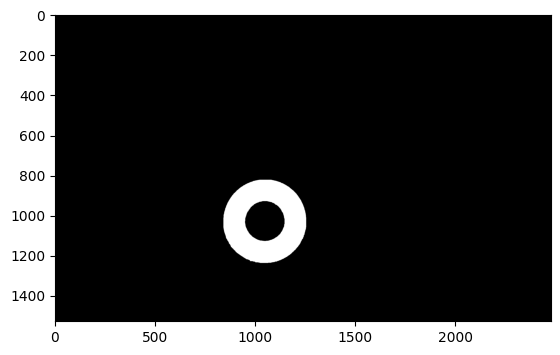

In [53]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("objects.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv, (155, 0, 0), (255, 255, 255))

kernel = np.ones((39, 39), np.uint8)
eroded = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
#cv2.namedWindow("mask", cv2.WINDOW_NORMAL)
#cv2.namedWindow("eroded", cv2.WINDOW_NORMAL)
#cv2.imshow("img", img)
#cv2.imshow("hsv", hsv[:, :, 0])
#cv2.imshow("mask", mask)
#cv2.imshow("eroded", eroded)
plt.imshow(eroded, cmap="gray")

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(10)

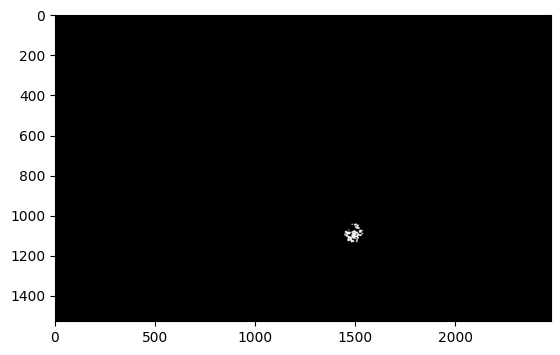

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("objects.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([20, 110, 110])
upper_yellow = np.array([30, 255, 255])

mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

kernel = np.ones((5, 5), np.uint8)
eroded = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

plt.imshow(eroded, cmap="gray")
plt.show()

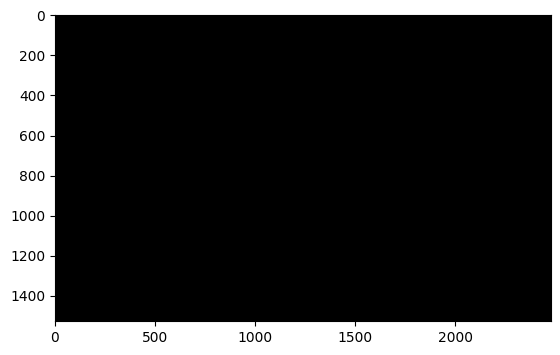

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("objects.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_gray = np.array([0, 100, 255])
upper_gray = np.array([179, 50, 255])

mask = cv2.inRange(hsv, lower_gray, upper_gray)

kernel = np.ones((5, 5), np.uint8)
eroded = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

plt.imshow(eroded, cmap="gray")
plt.show()

In [15]:
%matplotlib inline

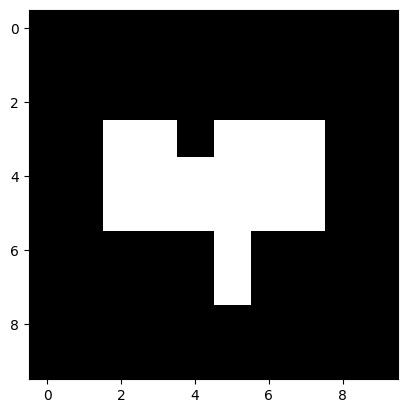

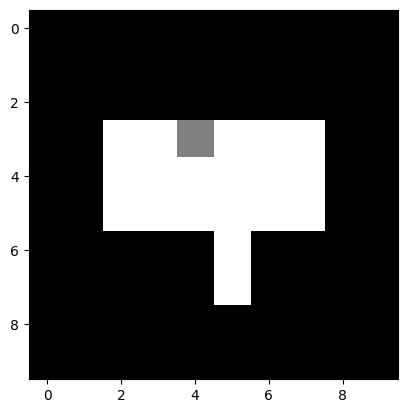

In [26]:
import numpy as np
import matplotlib.pyplot as plt
mask = np.zeros((10, 10), np.uint8)
mask[3:6, 2:8] = 255
mask[6:8, 5] = 255
mask[3:4, 4] = 0

kernel = np.ones((3, 3), np.uint8)
eroded = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

plt.imshow(mask, cmap="gray")
plt.show()
plt.imshow(eroded / 2 + mask / 2, cmap="gray")

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

cv2.namedWindow("mask",cv2.WINDOW_NORMAL)
cv2.resizeWindow("mask", 600, 900)

cv2.createTrackbar("hb", "mask", 128, 255, lambda i: 1)
cv2.createTrackbar("lb", "mask", 93, 255, lambda i: 1)
cv2.createTrackbar("hg", "mask", 178, 255, lambda i: 1)
cv2.createTrackbar("lg", "mask", 108, 255, lambda i: 1)
cv2.createTrackbar("hr", "mask", 77, 255, lambda i: 1)
cv2.createTrackbar("lr", "mask", 50, 255, lambda i: 1)
cv2.createTrackbar("min_size", "mask", 4001, 5000, lambda i: 1)  # Трекбар для минимального размера детектируемого объекта
cv2.createTrackbar("max_size", "mask", 8004, 10000, lambda i: 1)

img_ = cv2.imread("test.jpg")

while True:
    img = copy.deepcopy(img_)
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    hb = cv2.getTrackbarPos("hb", "mask")
    lb = cv2.getTrackbarPos("lb", "mask")
    hg = cv2.getTrackbarPos("hg", "mask")
    lg = cv2.getTrackbarPos("lg", "mask")
    hr = cv2.getTrackbarPos("hr", "mask")
    lr = cv2.getTrackbarPos("lr", "mask")
    ha = cv2.getTrackbarPos("min_size", "mask")
    la = cv2.getTrackbarPos("max_size", "mask")
    
    mask = cv2.inRange(hsv, (lb, lg, lr), (hb, hg, hr))
    
    cv2.imshow("mask", mask)
    
    key = cv2.waitKey(70) & 0xFF
    
    if key == "q":
        break
    
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(10)    


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'mask' in function 'cvGetTrackbarPos'


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_dist(channel):
    fig, ax = plt.subplots()
    ax.hist(channel.ravel(), 25, [0,256])
    
    fig.canvas.draw()
    dist = np.array(fig.canvas.renderer.buffer_rgba())
    plt.close()
    
    return dist

cv2.namedWindow("frame")

def nothing(x):
    pass

cv2.createTrackbar("hs", "frame", 256, 512, nothing)
cv2.createTrackbar("ss", "frame", 256, 512, nothing)
cv2.createTrackbar("vs", "frame", 256, 512, nothing)

video_path = "unicycle.mp4"
cam = cv2.VideoCapture(video_path)

while (True):
    success, frame = cam.read()
    
    if (success == False):
        cam.release()
        cam = cv2.VideoCapture(video_path)
        
        continue
    
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    hs = cv2.getTrackbarPos("hs", "frame")
    ss = cv2.getTrackbarPos("ss", "frame")
    vs = cv2.getTrackbarPos("vs", "frame")

    hsv_frame[:, :, 0] = cv2.add(hsv_frame[:, :, 0], hs - 256)
    hsv_frame[:, :, 1] = cv2.add(hsv_frame[:, :, 1], ss - 256)
    hsv_frame[:, :, 2] = cv2.add(hsv_frame[:, :, 2], vs - 256)
        
    dist_0 = plot_dist(hsv_frame[::30, ::30, 0])
    dist_1 = plot_dist(hsv_frame[::30, ::30, 1])
    dist_2 = plot_dist(hsv_frame[::30, ::30, 2])
    
    dists = np.concatenate((dist_0, dist_1, dist_2), axis=0)
    
    cv2.imshow("frame", cv2.cvtColor(hsv_frame, cv2.COLOR_HSV2BGR))
    cv2.imshow("dist_0", dists)
    
    key = cv2.waitKey(380) & 0xFF
    
    if (key == ord('q')):
        break

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)